In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from collections import namedtuple

In [2]:
Trait = namedtuple("Trait", ["name","n_genes","n_intergenic","s_genes","s_intergenic","h2_genes","h2_intergenic"])
n_genes_total = 135207
n_intergenic_total = 9410173

In [3]:
intelligence = Trait(name = "Intelligence",
                     n_genes = n_genes_total*1.65E-02,
                     n_intergenic = n_intergenic_total*9.31E-04,
                     s_genes = 5.67E-05,
                     s_intergenic = 4.86E-05,
                     h2_genes = 0.0292*100,
                     h2_intergenic = 0.1056*100)
scz = Trait(name = "SCZ",
            n_genes = n_genes_total*1.80E-02,
            n_intergenic = n_intergenic_total*2.24E-03,
            s_genes = 1.02E-04,
            s_intergenic = 5.84E-05,
            h2_genes = 0.0570*100,
            h2_intergenic = 0.3047*100)
bip = Trait(name = "BIP",
            n_genes = n_genes_total*1.74E-02,
            n_intergenic = n_intergenic_total*1.77E-03,
            s_genes = 1.08E-04,
            s_intergenic = 4.71E-05,
            h2_genes = 0.0583*100,
            h2_intergenic = 0.1939*100)
height = Trait(name = "Height",
               n_genes = n_genes_total*6.40E-02,
               n_intergenic = n_intergenic_total*5.01E-04,
               s_genes = 8.27E-05,
               s_intergenic = 2.94E-04,
               h2_genes = 0.1650*100,
               h2_intergenic = 0.3439*100)
ibd = Trait(name = "IBD",
            n_genes = n_genes_total*1.56E-02,
            n_intergenic = n_intergenic_total*2.05E-05,
            s_genes = 2.73E-04,
            s_intergenic = 2.37E-03,
            h2_genes = 0.1328*100,
            h2_intergenic = 0.1134*100)
t2d = Trait(name = "T2D",
            n_genes = n_genes_total*4.34E-02,
            n_intergenic = n_intergenic_total*5.48E-05,
            s_genes = 4.54E-05,
            s_intergenic = 5.41E-04,
            h2_genes = 0.0614*100,
            h2_intergenic = 0.0692*100)
traits = (intelligence, scz, bip, height, ibd, t2d)
#             orange, sky_blue, bluish_green, yellow, reddish_purple, vermillion, blue, black
CB_COLORS = ["#e69f00","#56b4e9","#009e73","#f0e442","#cc79a7","#d55e00","#0072b2","#000000"]

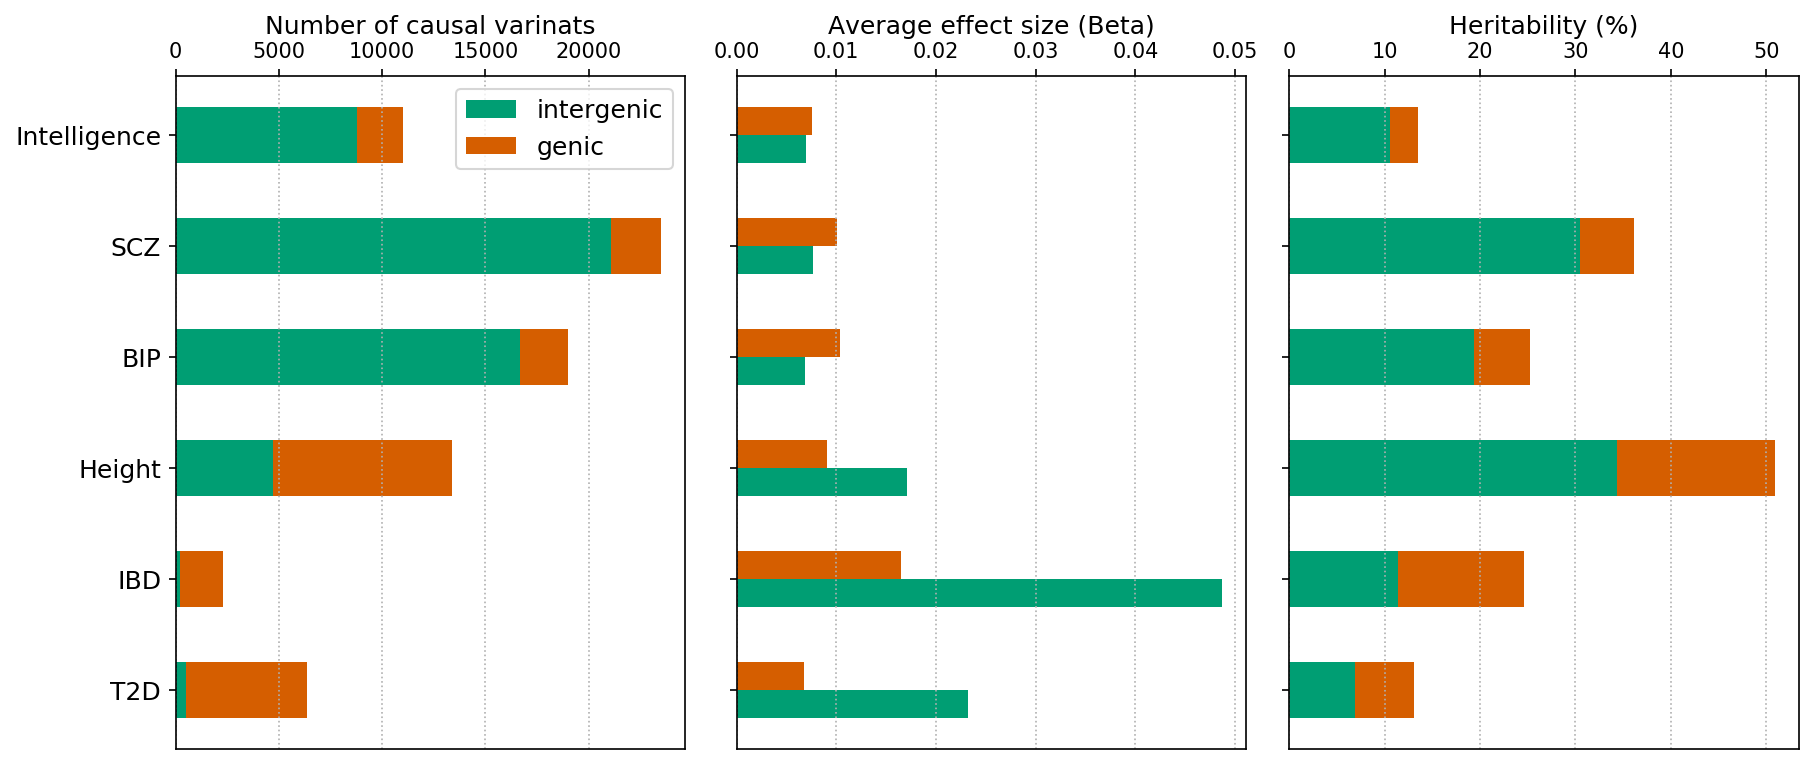

In [4]:
out_file = "parameters" + "_".join([t.name for t in traits]) + ".png"
save = True
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5), sharey=True, constrained_layout=True, dpi=150)
y_labels = [t.name for t in traits]
y_pos = range(len(traits))
width = 0.5
color_genes = "#d55e00"
color_intergenic = "#009e73"

n_causals_intergenic = [t.n_intergenic for t in traits]
n_causals_genes = [t.n_genes for t in traits]
axs[0].barh(y_pos, n_causals_intergenic, width, color=color_intergenic, label="intergenic")
axs[0].barh(y_pos, n_causals_genes, width, left=n_causals_intergenic, color=color_genes, label="genic")
axs[0].invert_yaxis()  # labels read top-to-bottom
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(y_labels, fontsize=12)
# axs[0].set_ylim([-0.5, 1.5])

axs[0].set_xlabel("Number of causal varinats", fontsize=12)
axs[0].xaxis.set_label_position('top') 
axs[0].xaxis.tick_top()
# axs[0].set_xscale('log')
# axs[0].set_xlim([1.E-5, 1.E-1])
axs[0].legend(fontsize=12)
axs[0].xaxis.grid(linestyle=':')

s_causals_intergenic = [sqrt(t.s_intergenic) for t in traits]
s_causals_genes = [sqrt(t.s_genes) for t in traits]
axs[1].barh(y_pos, s_causals_intergenic, 0.5*width, align="edge", color=color_intergenic, label="intergenic")
axs[1].barh(y_pos, s_causals_genes, -0.5*width, align="edge", color=color_genes, label="genic")

axs[1].set_xlabel("Average effect size (Beta)", fontsize=12)
axs[1].xaxis.set_label_position('top') 
axs[1].xaxis.tick_top()
# axs[1].set_xscale('log')
# axs[1].set_xlim([1.E-5, 1.E-1])
# axs[1].legend(fontsize=12)
axs[1].xaxis.grid(linestyle=':')


h2_intergenic = [t.h2_intergenic for t in traits]
h2_genes = [t.h2_genes for t in traits]
axs[2].barh(y_pos, h2_intergenic, width, color=color_intergenic, label="intergenic")
axs[2].barh(y_pos, h2_genes, width, left=h2_intergenic, color=color_genes, label="genic")
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(y_labels, fontsize=12)
# axs[2].set_ylim([-0.5, 1.5])

axs[2].set_xlabel("Heritability (%)", fontsize=12)
axs[2].xaxis.set_label_position('top') 
axs[2].xaxis.tick_top()
# axs[2].set_xscale('log')
# axs[2].set_xlim([1.E-5, 1.E-1])
# axs[2].legend(fontsize=12)
axs[2].xaxis.grid(linestyle=':')

if save:
    plt.savefig(out_file)

In [13]:
for t in traits: print(t.name, t.n_genes, t.n_intergenic)

intelligence 2230.9155 8760.871063
scz 2433.7259999999997 21078.787519999998
bip 2352.6018 16656.00621
height 8653.248 4714.496673000001
ibd 2109.2291999999998 192.9085465
t2d 5867.9838 515.6774803999999
